In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from dataprep.eda import create_report


# Importation de données

In [2]:
data_Retail = pd.read_excel("Online Retail.xlsx")

# 1- Compréhension des données:

In [3]:
data_Retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
data_Retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
data_Retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [6]:
data_Retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
data_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
data_Retail.shape

(541909, 8)

In [10]:
#create_report(data_Retail).show()

In [9]:
data_Retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 2-Préparation des données:

## 2.1 Suppression les doublons:

In [10]:
#verify unique
bool_series = data_Retail.duplicated()
bool_series
print(bool_series.describe())
data_Retail.index.is_unique

count     541909
unique         2
top        False
freq      536641
dtype: object


True

In [11]:
data_Retail = data_Retail.drop_duplicates()

In [12]:
data_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
data_Retail = data_Retail.reset_index(drop=True)

## 2.2 Traitement de colonnes:

In [14]:
for i in data_Retail.columns:
    print("*****************************************",i,"*********************************")
    print()
    print(set(data_Retail[i].tolist()))
    print()

***************************************** InvoiceNo *********************************

{'C538682', 'C554867', 'C565382', 'C577343', 'C571543', 'C567535', 'C572492', 'C567948', 'C553354', 'C560574', 'C578784', 'C581330', 'C575963', 'C564751', 'C573759', 'C570831', 'C579778', 'C566263', 'C572444', 'C574003', 'C542032', 'C545769', 'C557656', 'C541418', 'C577073', 'C568796', 'C579776', 'C573101', 'C569958', 'C573253', 'C554136', 'C560474', 'C538642', 'C572917', 'C581390', 'C559253', 'C541232', 'C538745', 'C548748', 'C572531', 'C560372', 'C555006', 'C540391', 'C572223', 'C539566', 'C566784', 'C562969', 'C567706', 'C559663', 'C566754', 'C572059', 'C537652', 'C567952', 'C555272', 'C561370', 'C567518', 'C569682', 'C556324', 'C558255', 'C538115', 'C546128', 'C562126', 'C580768', 'C577832', 'C576908', 'C559908', 'C542730', 'C572428', 'C543442', 'C580751', 'C571699', 'C551646', 'C555727', 'C563207', 'C567949', 'C575953', 'C541245', 'C554150', 'C545432', 'C553569', 'C543974', 'C555338', 'C569953',

## InvoiceNo

In [14]:
contains_c = any(data_Retail['InvoiceNo'].astype(str).str.contains('c'))

if contains_c:
    print("The 'InvoiceNo' column contains 'c'.")
else:
    print("The 'InvoiceNo' column does not contain 'c'.")

The 'InvoiceNo' column does not contain 'c'.


## Quantity




In [15]:
negative_quantity = data_Retail.loc[data_Retail['Quantity'] < 0, 'Quantity']
print(negative_quantity)

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
535188   -11
536280    -1
536447    -5
536448    -1
536449    -5
Name: Quantity, Length: 10587, dtype: int64


In [16]:
data_Retail = data_Retail.loc[data_Retail['Quantity'] > 0]

## Price

In [17]:
negative_price = data_Retail.loc[data_Retail['UnitPrice'] == 0, 'UnitPrice']
print(negative_price)

605       0.0
1934      0.0
1935      0.0
1936      0.0
1951      0.0
         ... 
530106    0.0
531753    0.0
533259    0.0
533260    0.0
533309    0.0
Name: UnitPrice, Length: 1174, dtype: float64


In [18]:
data_Retail = data_Retail.loc[data_Retail['UnitPrice'] > 0]

## CustomerID

In [19]:
unique_values_CustomerID = data_Retail['CustomerID'].unique()
print("Valeurs uniques de la colonne 'CustomerID ':")
print(unique_values_CustomerID)

Valeurs uniques de la colonne 'CustomerID ':
[17850. 13047. 12583. ... 13298. 14569. 12713.]


## Country

In [20]:
unique_values_Country = data_Retail['Country'].unique()
print("Valeurs uniques de la colonne 'Country':")
print(unique_values_Country)

Valeurs uniques de la colonne 'Country':
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


## StockCode

In [21]:
unique_values_StockCode = data_Retail['StockCode'].unique()
print("Valeurs uniques de la colonne 'StockCode':")
print(unique_values_StockCode)

Valeurs uniques de la colonne 'StockCode':
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]


In [22]:
values_not_length_5 = data_Retail[data_Retail['StockCode'].astype(str).str.len() == 11]['StockCode']

print("Les valeurs de la colonne 'StockCode' qui ne sont pas de longueur 6 sont :")
print(values_not_length_5)

Les valeurs de la colonne 'StockCode' qui ne sont pas de longueur 6 sont :
Series([], Name: StockCode, dtype: object)


In [23]:
data_Retail = data_Retail[data_Retail['StockCode'].astype(str).str.len() >= 5]

In [24]:
expected_formats = ['^\d{5,}']
# Filtrer les valeurs de la colonne "StockCode" qui ne correspondent pas aux formats attendus
values_not_expected_format = data_Retail[data_Retail['StockCode'].astype(str).str.contains('|'.join(expected_formats), regex=True)]['StockCode']

print("Les valeurs de la colonne 'StockCode' qui ne correspondent pas aux formats attendus sont :")
print(values_not_expected_format.unique)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9120\1677401878.py:1: SyntaxWarning: invalid escape sequence '\d'
  expected_formats = ['^\d{5,}']


Les valeurs de la colonne 'StockCode' qui ne correspondent pas aux formats attendus sont :
<bound method Series.unique of 0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
536636     22613
536637     22899
536638     23254
536639     23255
536640     22138
Name: StockCode, Length: 522504, dtype: object>


In [25]:
regex_at_least_five_digits = '^\d{5,}'  # Au moins cinq chiffres

# Filtrer les lignes qui correspondent au format spécifié
data_Retail = data_Retail[data_Retail['StockCode'].astype(str).str.contains(regex_at_least_five_digits, regex=True)]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9120\3425077076.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex_at_least_five_digits = '^\d{5,}'  # Au moins cinq chiffres


In [26]:
data_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
data_Retail.shape

(522504, 8)

##  2.3 Détection valeurs Manquantes

In [28]:
print("Missing values in each column after cleaning customerID :\n",data_Retail.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131354
Country             0
dtype: int64


In [29]:
data_Retail = data_Retail.dropna()

In [30]:
data_Retail = data_Retail.reset_index(drop=True)

In [31]:
data_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## 2.4 Détection des valeurs aberrantes:


In [32]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

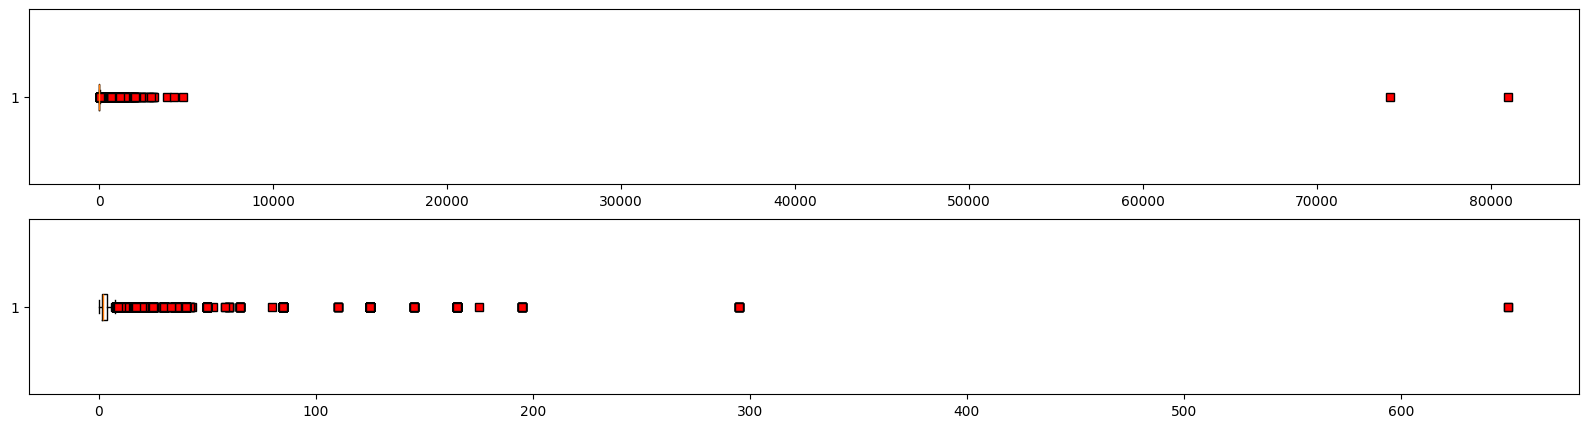

In [33]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(data_Retail[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [34]:
# Applying the functions for remove the outlier.
replace_with_threshold(data_Retail, "Quantity")
replace_with_threshold(data_Retail, "UnitPrice")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9120\2133905600.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '298.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


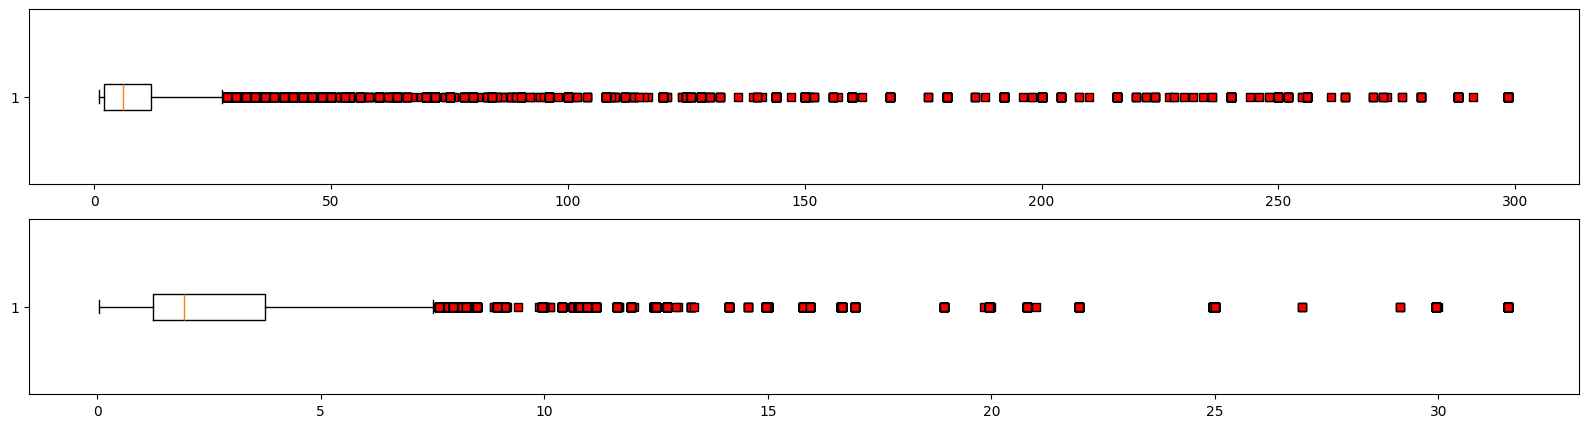

In [35]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data_Retail[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [42]:
data_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
data_Retail['TotalPrice'] = data_Retail['Quantity']*data_Retail['UnitPrice']

In [41]:
data_Retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
dtype: object

In [40]:
data_Retail['InvoiceDate'] = data_Retail['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

## Exportation de données

In [43]:
data_Retail.to_excel('data_Retail.xlsx', index=False, engine='openpyxl')


In [44]:
data_Retaile = pd.read_excel("data_Retail.xlsx")

In [45]:
data_Retaile['InvoiceDate']

0         2010-12-01 08:26:00
1         2010-12-01 08:26:00
2         2010-12-01 08:26:00
3         2010-12-01 08:26:00
4         2010-12-01 08:26:00
                 ...         
391145    2011-12-09 12:50:00
391146    2011-12-09 12:50:00
391147    2011-12-09 12:50:00
391148    2011-12-09 12:50:00
391149    2011-12-09 12:50:00
Name: InvoiceDate, Length: 391150, dtype: object

In [6]:
data_Retaile.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
dtype: object

## 3.Exploration des données / EDA (Exploratory Data Analysis)¶


## 3.1 Analyse des données:

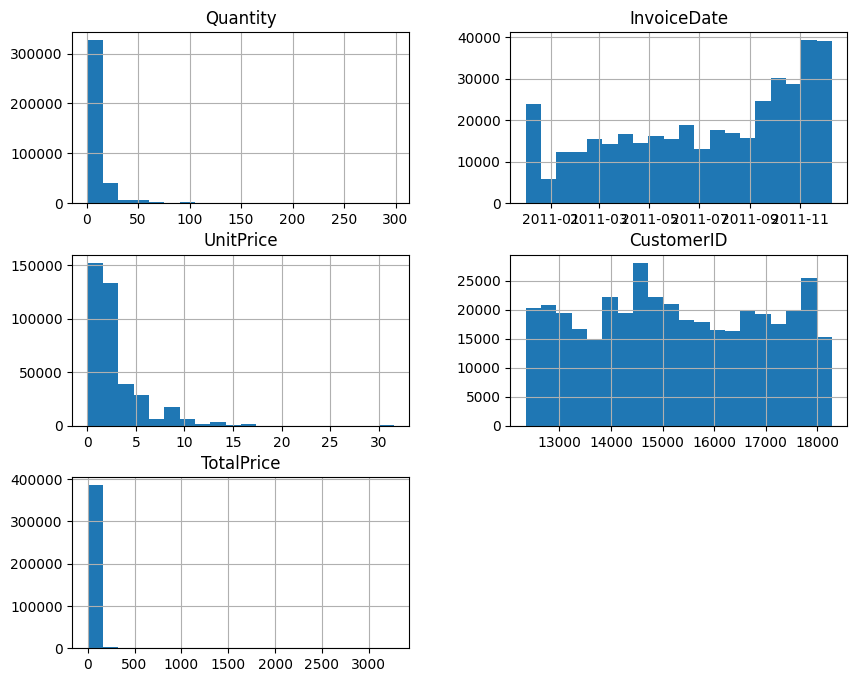

In [38]:
data_Retail.hist(figsize=(10, 8), bins=20)
plt.show()

## 3.2 Analyse des tendances des ventes au fil du temps:


In [39]:
data_Retail['Month'] = data_Retail['InvoiceDate'].dt.month_name()
data_Retail['DayOfWeek'] = data_Retail['InvoiceDate'].dt.day_name()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3012\4243784893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Retail['Month'] = data_Retail['InvoiceDate'].dt.month_name()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3012\4243784893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Retail['DayOfWeek'] = data_Retail['InvoiceDate'].dt.day_name()


In [40]:
monthly_sales = data_Retail.groupby('Month')['Quantity'].sum()

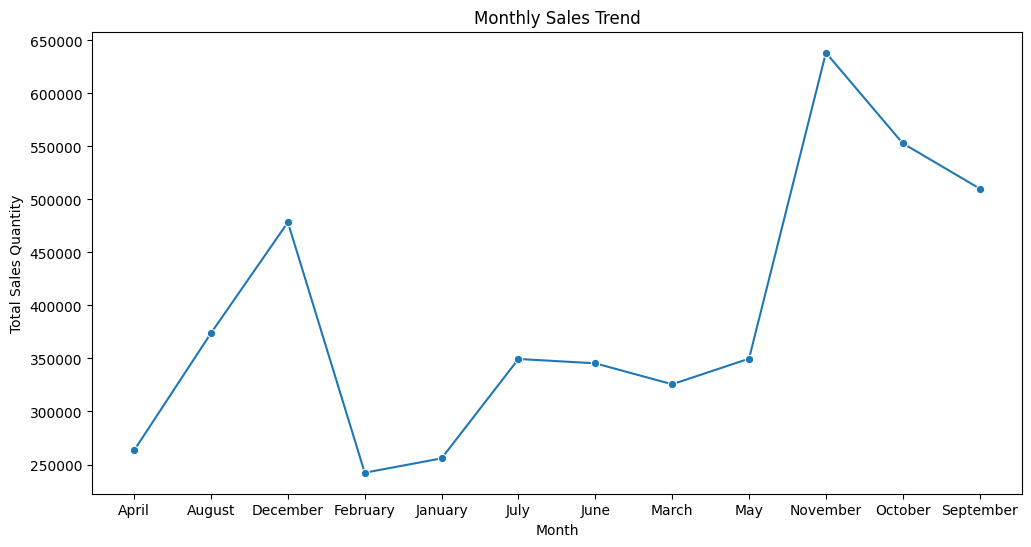

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3012\124818537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')


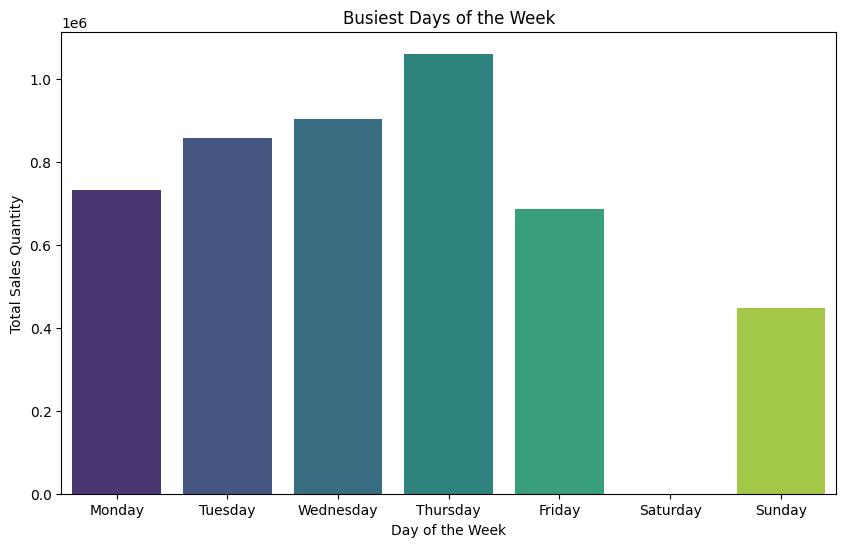

In [42]:
# Busiest days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = data_Retail.groupby('DayOfWeek')['Quantity'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.title('Busiest Days of the Week')
plt.show()

## 3.3 Exploration des produits les plus vendus et des pays:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3012\3677229188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


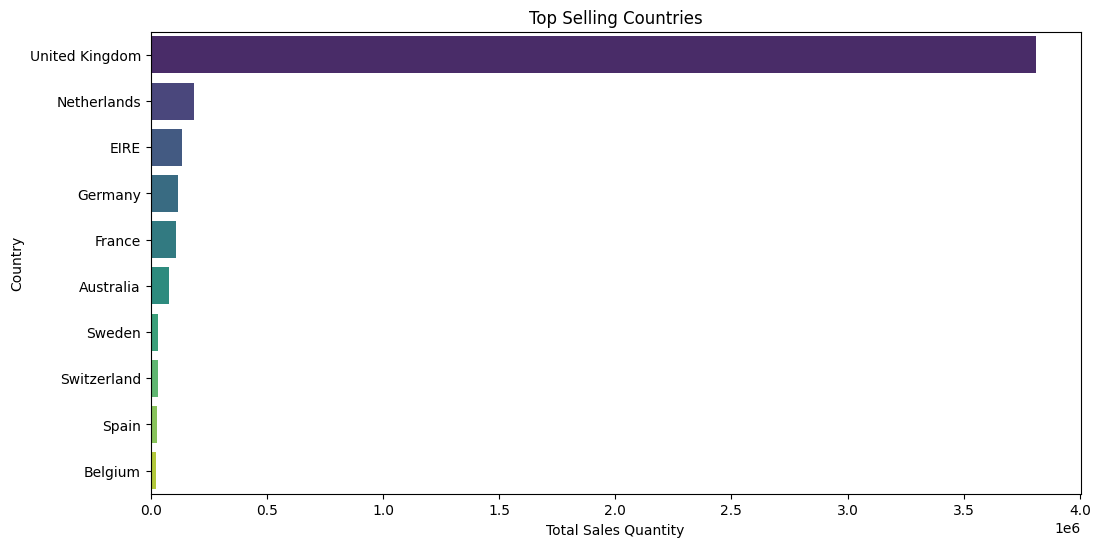

In [43]:
# Top-selling countries
top_countries = data_Retail.groupby('Country')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

## 3.4 Analyse de la distribution des valeurs dans les colonnes:

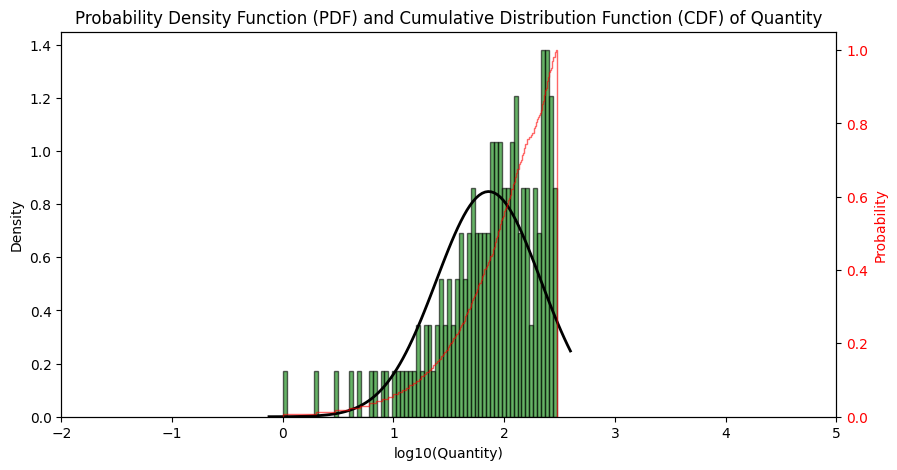

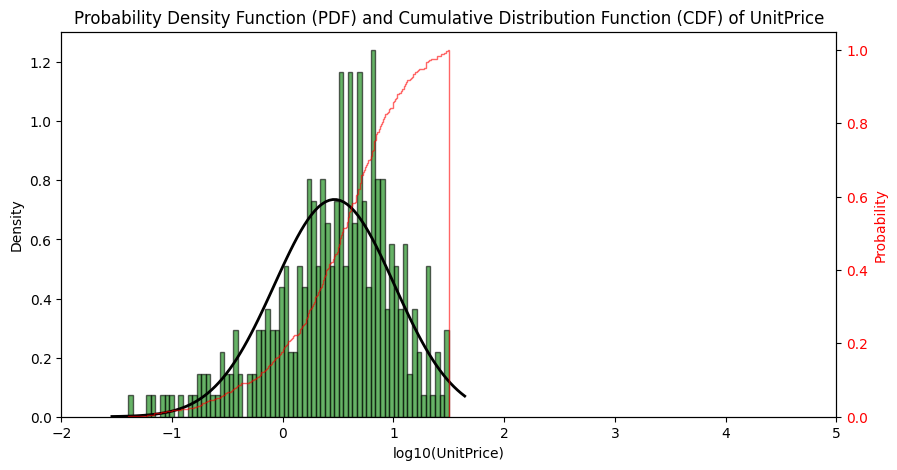

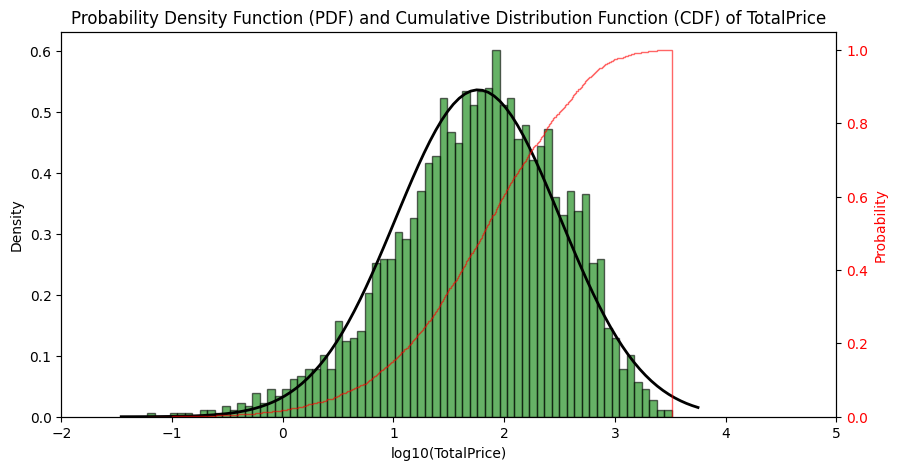

In [222]:
for col in ["Quantity", "UnitPrice","TotalPrice"]:
    # Calculate Frequency of each col value
    stats_df = data_Retail.groupby(col).size().reset_index(name='frequency')

    # Initialize figure and axes instances
    fig, ax1 = plt.subplots(figsize=(10, 5))
    # Axes 1
    ax1.hist(np.log10(stats_df[col]), 
            bins=70, 
            density=True,
            alpha=0.6, 
            color='g',
            edgecolor = "black")  # Histogram for empirical PDF

    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(np.log10(stats_df[col])), 
                np.std(np.log10(stats_df[col])))  # Theoretical PDF (assuming normal distribution)

    ax1.plot(x, p, 'k', linewidth=2)
    ax1.set_title(f'Probability Density Function (PDF) and Cumulative Distribution Function (CDF) of {col}')
    ax1.set_xlabel(f'log10({col})')
    ax1.set_ylabel('Density')
    ax1.set_xlim(-2, 5)

    # Axes 2
    ax2=ax1.twinx()
    ax2.hist(np.log10(stats_df[col]), 
            bins=500, 
            density=True, 
            cumulative=True, 
            alpha=0.6, 
            color='r', 
            histtype='step')  # Empirical CDF
    ax2.set_xlim(-2, 5)
    ax2.set_ylabel('Probability', color='r')
    ax2.tick_params(axis='y', labelcolor='r');

## Observations à partir du heatmap

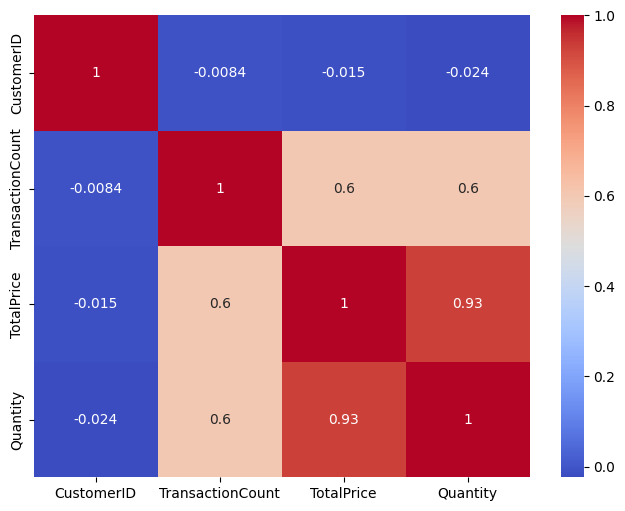

In [44]:
# Aggregating data per customer
customer_df = data_Retail.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique purchases (transactions)
    'TotalPrice': 'sum',  # Total spending
    'Quantity': 'sum'  # Total number of items purchased
}).rename(columns={'InvoiceNo': 'TransactionCount'}).reset_index()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Création du dataframe Customer

In [45]:
customer_df

,CustomerID,TransactionCount,TotalPrice,Quantity
0,12346.0,1,310.44,298.5
1,12347.0,7,4310.00,2458.0
2,12348.0,4,1437.24,2332.0
3,12349.0,1,1449.16,630.0
4,12350.0,1,294.40,196.0
...,...,...,...,...
4329,18280.0,1,180.60,45.0
4330,18281.0,1,80.82,54.0
4331,18282.0,2,178.05,103.0
4332,18283.0,16,2039.58,1355.0


In [46]:
# Selecting numerical features for standardization
numerical_features = ['TransactionCount', 'TotalPrice', 'Quantity']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
customer_df[numerical_features] = scaler.fit_transform(customer_df[numerical_features])

# Display the first few rows to ensure standardization worked correctly
print(customer_df.head())

   CustomerID  TransactionCount  TotalPrice  Quantity
0     12346.0         -0.425192   -0.203290 -0.180579
1     12347.0          0.360754    0.318073  0.317644
2     12348.0         -0.032219   -0.056406  0.288575
3     12349.0         -0.425192   -0.054852 -0.104098
4     12350.0         -0.425192   -0.205381 -0.204227


# 4 Clustering avec K-Means:


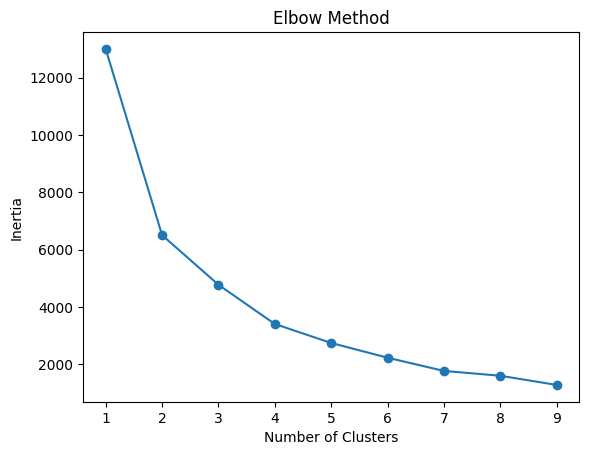

In [47]:
# Use inertia to identify the best number of clusters
inertia = []
range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_df[numerical_features])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_values, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Dans le graphique, l'inertie diminue significativement lorsque le nombre de clusters passe de 1 à 2 et continue de diminuer lorsque nous passons à 3 clusters. Après 3 clusters, le taux de diminution de l'inertie ralentit, suggérant que des clusters supplémentaires n'expliquent pas beaucoup plus de la variance dans les données. Par conséquent, nous créerons 3 clusters pour ce cas d'utilisation.

In [48]:
# Assume optimal_clusters is the number of clusters you've chosen based on the Elbow Method
optimal_clusters = 3  # This is just an example, replace with the actual number you determined

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(customer_df[numerical_features])

# Assign the clusters to each data point
customer_df['Cluster'] = kmeans.labels_

In [49]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=numerical_features)
print(cluster_centers)

# Count the number of customers in each cluster
print(customer_df['Cluster'].value_counts())

# Analyze the properties of each cluster
cluster_analysis = customer_df.groupby('Cluster')[numerical_features].mean()
print(cluster_analysis)

   TransactionCount  TotalPrice   Quantity
0         -0.159392   -0.108256  -0.106089
1          9.774646   12.927967  12.924162
2          2.136349    1.051235   1.013977
Cluster
0    4083
2     236
1      15
Name: count, dtype: int64
         TransactionCount  TotalPrice   Quantity
Cluster                                         
0               -0.159392   -0.108256  -0.106089
1                9.774646   12.927967  12.924162
2                2.136349    1.051235   1.013977


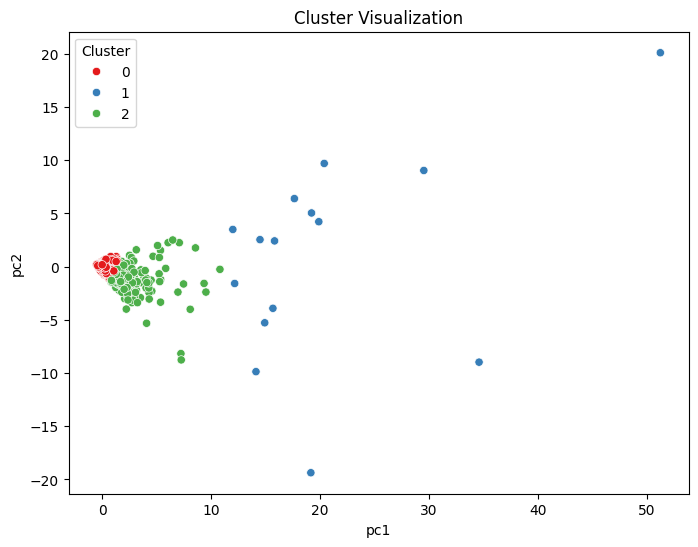

In [50]:
# If you have more than 2 features, you can use PCA to reduce to 2D for visualization purposes
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customer_df['pc1'], customer_df['pc2'] = zip(*pca.fit_transform(customer_df[numerical_features]))

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=customer_df, palette='Set1')
plt.title('Cluster Visualization')
plt.show()


Les clients du Cluster 2 constituent le groupe de clients principaux avec des habitudes de dépenses moyennes et pourraient être ciblés avec des stratégies marketing générales.

Les clients du Cluster 0 sont précieux avec des dépenses potentiellement plus élevées et pourraient être réceptifs à des activités promotionnelles encourageant une fréquence ou un volume d'achat accru.

Les clients du Cluster 1 sont probablement les plus précieux et pourraient être au centre de services premium, d'offres exclusives ou d'autres efforts marketing haut de gamme.